In [183]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
#Leo file y lo guardo en un DF inicial
df_properatti = pd.read_csv('properatti.csv')

In [207]:
#Reviso el contenido
#df_properatti.head()

#del df_properatti['operation']
#del df_properatti['properati_url']
del df_properatti['image_thumbnail']
df_properatti.head()

,Unnamed: 0,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [6]:
df_properatti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 26 columns):
Unnamed: 0                    25792 non-null int64
operation                     25792 non-null object
property_type                 25792 non-null object
place_name                    25784 non-null object
place_with_parent_names       25792 non-null object
country_name                  25792 non-null object
state_name                    25792 non-null object
geonames_id                   21463 non-null float64
lat-lon                       21471 non-null object
lat                           21471 non-null float64
lon                           21471 non-null float64
price                         20162 non-null float64
currency                      20161 non-null object
price_aprox_local_currency    20162 non-null float64
price_aprox_usd               20162 non-null float64
surface_total_in_m2           17774 non-null float64
surface_covered_in_m2         22004 non-null float64


In [179]:
df_properatti.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,25792.000000,2.146300e+04,21471.000000,21471.000000,2.016200e+04,2.016200e+04,2.016200e+04,17774.000000,22004.000000,13928.000000,1.790300e+04,2572.000000,16888.000000,1.182000e+03
mean,12895.500000,3.555862e+06,-34.687095,-59.281614,4.032849e+05,4.417899e+06,2.503839e+05,324.815067,132.045719,1959.499413,5.911509e+03,27.700233,2.938477,4.139551e+03
std,7445.653408,3.530665e+05,2.073653,2.344858,7.358548e+05,8.198482e+06,4.646480e+05,2373.591935,277.147175,2154.731071,2.450907e+04,151.992064,1.597673,3.709501e+04
min,0.000000,3.427212e+06,-54.806598,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.165872e+01,1.000000,1.000000,1.000000e+00
25%,6447.750000,3.430114e+06,-34.692154,-58.784557,1.030125e+05,1.583309e+06,8.973388e+04,55.000000,47.000000,971.330313,1.507692e+03,1.000000,2.000000,1.000000e+03
50%,12895.500000,3.432039e+06,-34.602437,-58.518732,1.790000e+05,2.629030e+06,1.490000e+05,111.000000,81.000000,1666.666667,2.142857e+03,3.000000,3.000000,1.800000e+03
75%,19343.250000,3.436397e+06,-34.424329,-58.386077,3.850000e+05,4.940460e+06,2.800000e+05,298.000000,165.000000,2372.022500,3.189655e+03,6.000000,4.000000,3.300000e+03
max,25791.000000,6.942842e+06,4.545843,-54.560043,4.654544e+07,8.212711e+08,4.654544e+07,200000.000000,18635.000000,44425.675676,1.800000e+06,1609.000000,25.000000,1.250000e+06


In [236]:
df_properatti['operation'].unique()

array(['sell'], dtype=object)

In [239]:
df_properatti['country_name'].unique()

array(['Argentina'], dtype=object)

In [237]:
df_properatti['property_type'].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [238]:
df_properatti['place_name'].unique()

array(['Mataderos', 'La Plata', 'Liniers', ..., 'Laguna Paiva',
       'Malabrigo', 'Altos de Hudson I'], dtype=object)

In [241]:
df_properatti['state_name'].unique()
df_properatti['state_name'].nunique()

28

In [243]:
df_properatti['place_with_parent_names'].nunique()

1164

In [182]:
#Creo un df con todos los nulls y hago un overview para determinar que columnas tienen valores nulos y cuantos tienen
df_nulls = df_properatti.isnull()
df_nulls.sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        8
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                    4329
lat-lon                        4321
lat                            4321
lon                            4321
price                          5630
currency                       5631
price_aprox_local_currency     5630
price_aprox_usd                5630
surface_total_in_m2            8018
surface_covered_in_m2          3788
price_usd_per_m2              11864
price_per_m2                   7889
floor                         23220
rooms                          8904
expenses                      24610
properati_url                     0
description                       1
title                             0
image_thumbnail                 338
dtype: int64

In [192]:
#Creo un df agregado por barrio, con la idea de obtener datos estadisticos por barrio para las variable numericas.
#con la idea de obtener una columna que me ayude a determinar que tipo de distribuciòn una determinada variable,
#creo una funcion

#Creo una funcion para calcular P valor, que me ayude a determinar que si la distribucion de una variable es normal o no

def statics(x):
    '''La función recibe un array numerico y devuelve un booleano.
    True: cuando la distribución del array tiende a ser normal(si el array tiene entre 5 y 5000 valores usa shapiro,
          si tiene mas valores entonces usa kstest.
    False: cuando la distribución no es normal o cuando el array tiene menos de 5 valores.'''
    if len(x) < 5: #Si el array tiene menos de 5 valores, no se puede determinar si la distribucion es normal
        return False
    
    elif 5000 > len(x) > 5: #para arrays de hasta 5000 valores uso shapiro 
        return stats.shapiro(x)[1] < 0.05
        
    else:#para arrays de mas 5000 valores uso kstest
        return stats.kstest(df_properatti['price'], 'norm')[1] > 0.05

In [193]:
# Pruebo hacer la agrupaciòn por barrio con multiples variables numericas y varias agregaciones por cada variable
df_properatti.groupby('place_with_parent_names',as_index=False).agg({'price':['min', 'max','mean', statics],
                                                                     'price_aprox_local_currency': ['min', 'max','mean'],
                                                                     'price_aprox_usd'           :['min', 'max','mean'],
                                                                     'price_usd_per_m2'          :['min', 'max','mean'],
                                                                     'price_per_m2'              :['min', 'max','mean'],
                                                                     'floor'                     :['min', 'max','mean'],
                                                                     'expenses'                  :['min', 'max','mean'],
                                                                     'surface_total_in_m2'       :['sum', 'mean'],
                                                                     'surface_covered_in_m2'     :['sum', 'mean']})

C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


place_with_parent_names      price             \
                                                              min        max   
0                 |Argentina|Bs.As. G.B.A. Zona Norte|    35000.0   680000.0   
1         |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|    25000.0  1100000.0   
2    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ac...   210000.0   275000.0   
3    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Al...   135000.0   135000.0   
4    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   350000.0   365000.0   
5    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   450000.0   450000.0   
6    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...        NaN        NaN   
7    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   650000.0   650000.0   
8    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...   205000.0   247000.0   
9    |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Be...    17000.0  1200000.0   
10   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ca...   150000.0   150000.0   
11   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Co...   240000.0   285000.0   
12   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Co...   290000.0   290000.0   
13   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   210000.0   220000.0   
14   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|El...   145000.0   650000.0   
15   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Fi...   235000.0   235000.0   
16   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ga...    60000.0   540000.0   
17   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ha...   215000.0   680000.0   
18   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Lo...   130000.0   280000.0   
19   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Lo...   250000.0   345000.0   
20   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Lo...   155000.0   155000.0   
21   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ma...    73000.0    73000.0   
22   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ma...    65000.0  2428220.0   
23   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ma...   120000.0   245000.0   
24   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Mi...   295000.0   420000.0   
25   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Sa...   230000.0   235000.0   
26   |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Se...   128000.0  1300000.0   
27   |Argentina|Bs.As. G.B.A. Zona Norte|General Sa...    40000.0   400000.0   
28   |Argentina|Bs.As. G.B.A. Zona Norte|General Sa...    24500.0   125000.0   
29   |Argentina|Bs.As. G.B.A. Zona Norte|General Sa...    45000.0   160000.0   
..                                                 ...        ...        ...   
775                 |Argentina|Santa Fe|Pueblo Esther|    55000.0    55000.0   
776                         |Argentina|Santa Fe|Pérez|   198000.0   198000.0   
777                       |Argentina|Santa Fe|Rafaela|        NaN        NaN   
778                   |Argentina|Santa Fe|Reconquista|  2500000.0  2500000.0   
779                        |Argentina|Santa Fe|Recreo|   930000.0   930000.0   
780                     |Argentina|Santa Fe|Ricardone|   850000.0   850000.0   
781                        |Argentina|Santa Fe|Roldán|    54000.0  1600000.0   
782                       |Argentina|Santa Fe|Rosario|    35000.0  9190624.0   
783             |Argentina|Santa Fe|San Carlos Centro|   850000.0   850000.0   
784                 |Argentina|Santa Fe|San Cristóbal|        NaN        NaN   
785                    |Argentina|Santa Fe|San Javier|        NaN        NaN   
786            |Argentina|Santa Fe|San Jerónimo Norte|        NaN        NaN   
787           |Argentina|Santa Fe|San José del Rincón|        NaN        NaN   
788                     |Argentina|Santa Fe|San Justo|   750000.0   750000.0   
789                   |Argentina|Santa Fe|San Lorenzo|    80000.0   950000.0   
790                      |Argentina|Santa Fe|Santa Fe|    50000.0  3700000.0   
791                  |Argentina|Santa Fe|Santa Teresa|        NaN        NaN   
792                    |Argenti

In [195]:
#Creo un diccionario por comprensiòn para usar en la agregacion de las variables numericas
lista_cols = ['price', 'price_aprox_local_currency']
funciones_agregacion = ['min', 'max',np.mean, statics]
condiciones_agregacion = {col: funciones_agregacion for col in lista_cols}

In [197]:
df_stats_geo = df_properatti.groupby('place_with_parent_names',as_index=False).agg(condiciones_agregacion)

C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [199]:
df_stats_geo.head()

place_with_parent_names     price             \
                                                           min        max   
0               |Argentina|Bs.As. G.B.A. Zona Norte|   35000.0   680000.0   
1       |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|   25000.0  1100000.0   
2  |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ac...  210000.0   275000.0   
3  |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Al...  135000.0   135000.0   
4  |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ba...  350000.0   365000.0   

                         price_aprox_local_currency                            \
            mean statics                        min         max          mean   
0  220076.923077   False                   617557.5  11998260.0  3.883147e+06   
1  268519.083969   False                   441112.5  19408950.0  4.623462e+06   
2  241666.666667   False                  3705345.0   4852237.5  4.264088e+06   
3  135000.000000   False                  2382007.5   2382007.5  2.382008e+06   
4  357500.000000   False                  6175575.0   6440242.5  6.307909e+06   

           
  statics  
0   False  
1   False  
2   False  
3   False  
4   False

In [265]:
#Todas las geografias que tienen una ditribucion normal sns.distplot(
df_stats_geo[df_stats_geo['price']['statics'] == True].nunique()
barrio = df_stats_geo[df_stats_geo['price']['statics'] == True].iloc[3][0]
print(barrio)

|Argentina|Bs.As. G.B.A. Zona Norte|Malvinas Argentinas|Malvinas Argentinas|


In [ ]:
#Validamos algunas distribuciones
cond_mschw = df_price['place_with_parent_names'] == barrio
cond_prec = df_price['price'] < 600000
cond_null = df_properatti['']

In [257]:
df_price_usd_per_m2 = df_properatti[df_properatti['price_usd_per_m2'].isnull()==False]

#Verifico que no haya nulos en la columna que quiero analizar
df_price_usd_per_m2[['price_usd_per_m2']].isnull().sum()

price_usd_per_m2    0
dtype: int64

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


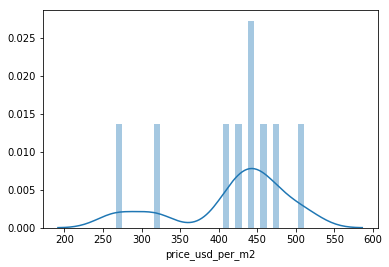

In [267]:
#Este grafico muestra la distribucion de los m2 de las propiedades de Mataderos
sns.distplot(df_price_usd_per_m2[df_price_usd_per_m2['place_with_parent_names'] == barrio]['price_usd_per_m2'], bins = 30)

In [259]:
sns.distplot(df_df_price_usd_per_m2[df_df_price_usd_per_m2['place_name'] == 'Mataderos']['price_usd_per_m2'])

NameError: name 'df_df_price_usd_per_m2' is not defined

In [14]:
df_properatti['country_name'].unique()

array(['Argentina'], dtype=object)

In [19]:
df_properatti[df_properatti['description'].isnull()==True]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
10664,10664,sell,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Argentina,Córdoba,3832791.0,"-31.4207828,-64.4992141",-31.420783,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/168nc_venta_depart...,NaN,HERMOSO DEPARTAMENTO CON PISCINA Y COCHERA,https://thumbs4.properati.com/6/JiAoy6zsKPeBob...


In [22]:
df_properatti.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        8
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                    4329
lat-lon                        4321
lat                            4321
lon                            4321
price                          5630
currency                       5631
price_aprox_local_currency     5630
price_aprox_usd                5630
surface_total_in_m2            8018
surface_covered_in_m2          3788
price_usd_per_m2              11864
price_per_m2                   7889
floor                         23220
rooms                          8904
expenses                      24610
properati_url                     0
description                       1
title                             0
image_thumbnail                 338
dtype: int64

In [76]:
df_properatti[['price_aprox_usd']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 1 columns):
price_aprox_usd    20162 non-null float64
dtypes: float64(1)
memory usage: 201.6 KB


In [40]:
df_properatti[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 1 columns):
price    20162 non-null float64
dtypes: float64(1)
memory usage: 201.6 KB


([array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([ 25798.49 ,  42718.641,  59638.792,  76558.943,  93479.094,
        110399.245, 127319.396, 144239.547, 161159.698, 178079.849,
        195000.   ]),
 <a list of 10 Lists of Patches objects>)

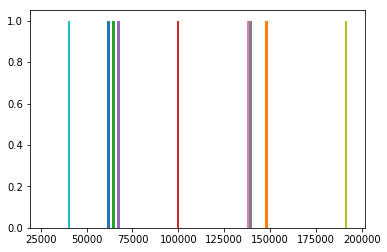

In [81]:
df_price = df_properatti[['price_aprox_usd']]
plt.hist(df_price.head(10))

ValueError: max must be larger than min in range parameter.

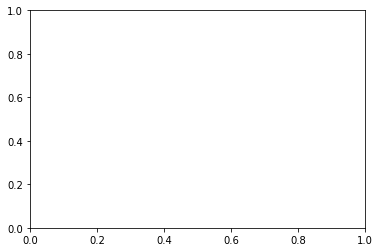

In [99]:
plt.hist(df_price['price_aprox_usd'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


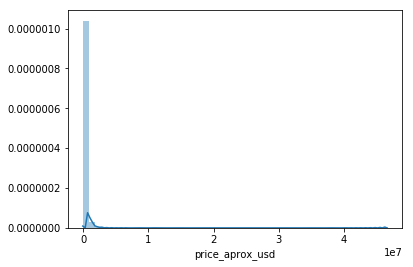

In [114]:
sns.distplot(df_properatti[df_properatti['price_aprox_usd'].isnull()==False]['price_aprox_usd'])

In [144]:
df_price_usd = df_properatti[df_properatti['price_aprox_usd'].isnull()==False]

In [145]:
df_price_usd.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [161]:
df_price_usd['place_name'].nunique()
df_price_usd['place_with_parent_names'].nunique()

704

In [137]:
df_mataderos = df_price_usd[df_price_usd['place_name']=='Mataderos']

In [152]:
df_mataderos['place_name'].unique()

array(['Mataderos'], dtype=object)

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


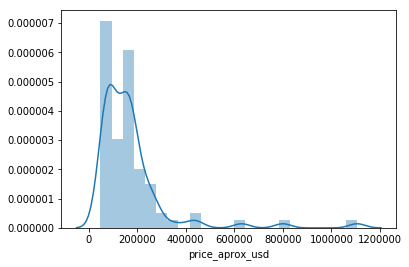

In [142]:
sns.distplot(df_mataderos['price_aprox_usd'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


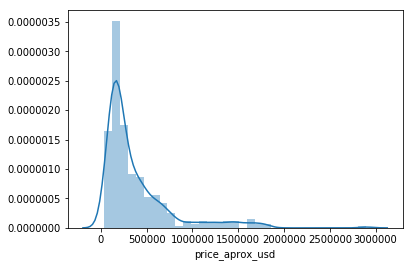

In [149]:
df_palermo = df_price_usd[df_price_usd['place_name']=='Palermo']
sns.distplot(df_palermo['price_aprox_usd'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


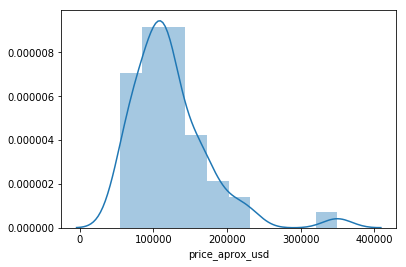

In [150]:
df_Lomas_de_zamora = df_price_usd[df_price_usd['place_name']=='Lomas de Zamora']
sns.distplot(df_Lomas_de_zamora['price_aprox_usd'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


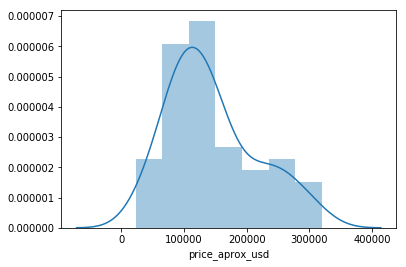

In [154]:
df_Liniers = df_price_usd[df_price_usd['place_name']=='Liniers']
sns.distplot(df_Liniers['price_aprox_usd'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


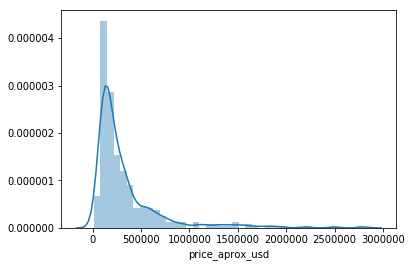

In [155]:
df_belgrano = df_price_usd[df_price_usd['place_name']=='Belgrano']
sns.distplot(df_belgrano['price_aprox_usd'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


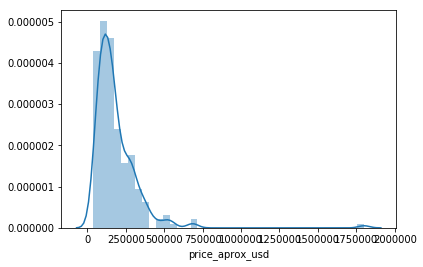

In [162]:
df_almagro = df_price_usd[df_price_usd['place_name']=='Almagro']
sns.distplot(df_almagro['price_aprox_usd'])

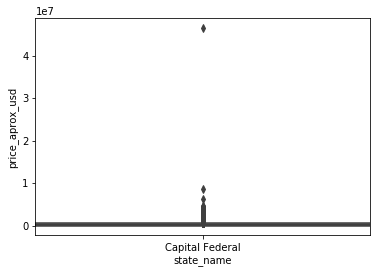

In [177]:

sns.boxplot(x= 'state_name',y = 'price_aprox_usd', data = df_price_usd[df_price_usd['state_name']=='Capital Federal'],width = 8.0)

(array([152.,  51.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  40000.,  216000.,  392000.,  568000.,  744000.,  920000.,
        1096000., 1272000., 1448000., 1624000., 1800000.]),
 <a list of 10 Patch objects>)

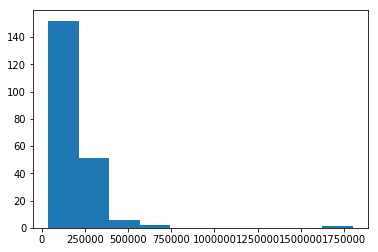

In [178]:
plt.hist(df_almagro['price_aprox_usd'])

In [191]:
from scipy import stats
np.random.seed(12345678)
xy = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(xy)

(0.9772805571556091, 0.08144091814756393)

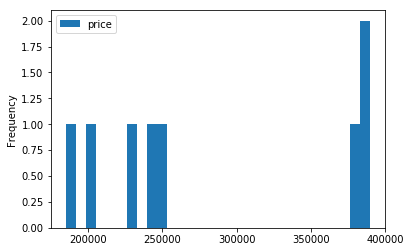

In [269]:
cond_mschw = df_price['place_with_parent_names'] == barrio
cond_prec = df_price['price'] < 600000
df_price.loc[cond_mschw & cond_prec,['price']].plot.hist(bins=30)